In [1]:
# Read txt
import csv

def read_int_from_file(file_location):
    numbers = []
    with open(file_location) as tsv:
        for column in zip(*[line for line in csv.reader(tsv, dialect="excel-tab")]):
            for num in column:
                numbers.append(num)
    while '' in numbers:
        numbers.remove('')
    
    #print(numbers)
    print(file_location + " has " + str(len(numbers)) + " of entries.")
    numbers_int = map(int, numbers)
    numbers_int_list = list(numbers_int)
    
    return numbers_int_list

def read_int_from_file_float(file_location):
    numbers = []
    with open(file_location) as tsv:
        for column in zip(*[line for line in csv.reader(tsv, dialect="excel-tab")]):
            for num in column:
                numbers.append(num)
    while '' in numbers:
        numbers.remove('')
    
    #print(numbers)
    print(file_location + " has " + str(len(numbers)) + " of entries.")
    numbers_float = map(float, numbers)
    numbers_float_list = list(numbers_float)
    
    return numbers_float_list

interference_0_list = read_int_from_file("time_record/no_interference.txt")
interference_2_list = read_int_from_file("time_record/2_interference.txt")
interference_4_list = read_int_from_file("time_record/4_interference.txt")
interference_0_list_TCP = read_int_from_file_float("time_record/no_interference_TCP.txt")
interference_2_list_TCP = read_int_from_file_float("time_record/2_interference_TCP.txt")
interference_4_list_TCP = read_int_from_file_float("time_record/4_interference_TCP.txt")

interference_0_list_chunks = [interference_0_list[x:x+20] for x in range(0, len(interference_0_list), 20)]
interference_2_list_chunks = [interference_2_list[x:x+17] for x in range(0, len(interference_2_list), 17)]
interference_4_list_chunks = [interference_4_list[x:x+17] for x in range(0, len(interference_4_list), 17)]
interference_0_list_TCP_chunks = [interference_0_list_TCP[x:x+20] for x in range(0, len(interference_0_list_TCP), 20)]
interference_2_list_TCP_chunks = [interference_2_list_TCP[x:x+17] for x in range(0, len(interference_2_list_TCP), 17)]
interference_4_list_TCP_chunks = [interference_4_list_TCP[x:x+17] for x in range(0, len(interference_4_list_TCP), 17)]

time_record/no_interference.txt has 280 of entries.
time_record/2_interference.txt has 238 of entries.
time_record/4_interference.txt has 238 of entries.
time_record/no_interference_TCP.txt has 280 of entries.
time_record/2_interference_TCP.txt has 238 of entries.
time_record/4_interference_TCP.txt has 238 of entries.


In [2]:
#Plot a single scenario
import numpy as np
import matplotlib.pyplot as plt

def plot_each_step_latency(chunks_array):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 8)
    plt.ylabel('Latency (ms)', fontsize=12)
    
    ax.boxplot(chunks_array[0:10])
    ax.set_xticklabels([
        "Start\n<->\nSECC Discovery",
        "SECC Discovery\n<->\nSession Initialized",
        "Session Initialized\n<->\nSupportedAppProtocol",
        "SupportedAppProtocol\n<->\nSessionSetup",
        "SessionSetup\n<->\nServiceDiscovery",
        "ServiceDiscovery\n<->\nPaymentServiceSelection",
        "PaymentServiceSelection\n<->\nPaymentDetail",
        "PaymentDetail\n<->\nAuthorization",
        "Authorization\n<->\nChargeParameterDiscovery",
        "ChargeParameterDiscovery\n<->\nStart Charging"
        ], fontsize=10)
    plt.grid()
    plt.show()

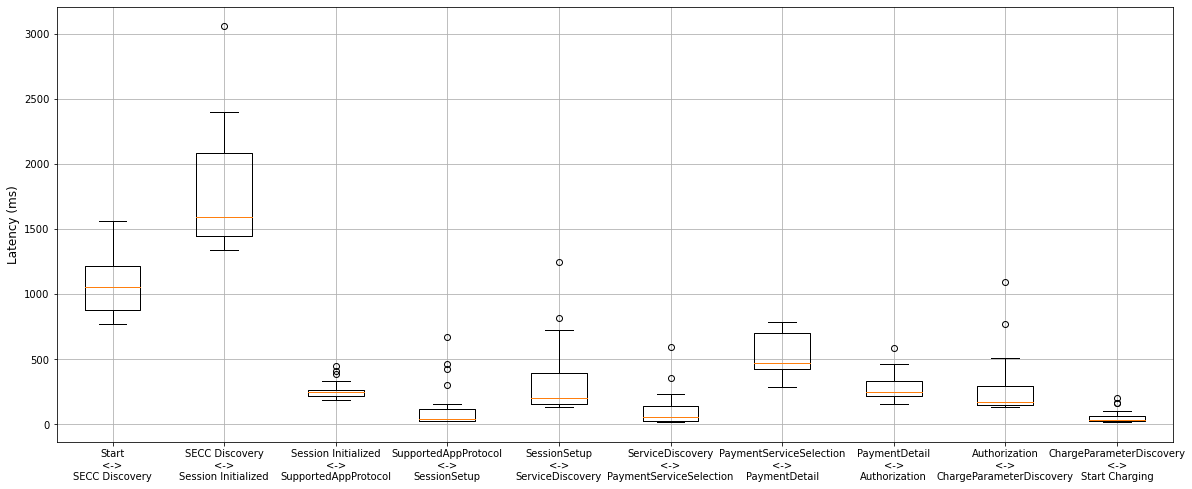

In [3]:
plot_each_step_latency(interference_0_list_chunks)

In [4]:
#Plot all scenarios
import pandas as pd

def construct_dataframe(list_chunk, interference_num, index, type_str):
    return pd.DataFrame({'Latency (ms)': list_chunk[index],
                         'Coexistence': [interference_num for _ in range(len(list_chunk[index]))],
                         'Stage': [index+1 for _ in range(len(list_chunk[index]))],
                         'Type': type_str
                        })

stage_num = 10
interference_0_df = {i: construct_dataframe(interference_0_list_chunks, 0, i, "Application") for i in range(0, stage_num)}
interference_2_df = {i: construct_dataframe(interference_2_list_chunks, 2, i, "Application") for i in range(0, stage_num)}
interference_4_df = {i: construct_dataframe(interference_4_list_chunks, 4, i, "Application") for i in range(0, stage_num)}

interference_0_TCP_df = {i: construct_dataframe(interference_0_list_TCP_chunks, 0, i, "TCP") for i in range(0, stage_num)}
interference_2_TCP_df = {i: construct_dataframe(interference_2_list_TCP_chunks, 2, i, "TCP") for i in range(0, stage_num)}
interference_4_TCP_df = {i: construct_dataframe(interference_4_list_TCP_chunks, 4, i, "TCP") for i in range(0, stage_num)}

interference_0_df_all = pd.concat(interference_0_df[i] for i in range(0, stage_num))
interference_2_df_all = pd.concat(interference_2_df[i] for i in range(0, stage_num))
interference_4_df_all = pd.concat(interference_4_df[i] for i in range(0, stage_num))

interference_0_TCP_df_all = pd.concat(interference_0_TCP_df[i] for i in range(0, stage_num))
interference_2_TCP_df_all = pd.concat(interference_2_TCP_df[i] for i in range(0, stage_num))
interference_4_TCP_df_all = pd.concat(interference_4_TCP_df[i] for i in range(0, stage_num))


dataframe_all = pd.concat([interference_0_df_all, interference_2_df_all, interference_4_df_all])

dataframe_TCP_all = pd.concat([interference_0_TCP_df_all, interference_2_TCP_df_all, interference_4_TCP_df_all])

In [5]:
stage_string = ["Start\n<->\nSECC\nDiscovery",
    "SECC\nDiscovery\n<->\nSession\nInitialized",
    "Session\nInitialized\n<->\nSupportedApp\nProtocol",
    "SupportedApp\nProtocol\n<->\nSessionSetup",
    "SessionSetup\n<->\nService\nDiscovery",
    "Service\nDiscovery\n<->\nPaymentService\nSelection",
    "PaymentService\nSelection\n<->\nPayment\nDetails",
    "Payment\nDetails\n<->\nAuthorization",
    "Authorization\n<->\nChargeParameter\nDiscovery",
    "ChargeParameter\nDiscovery\n<->\nStart\nCharging"
    ]

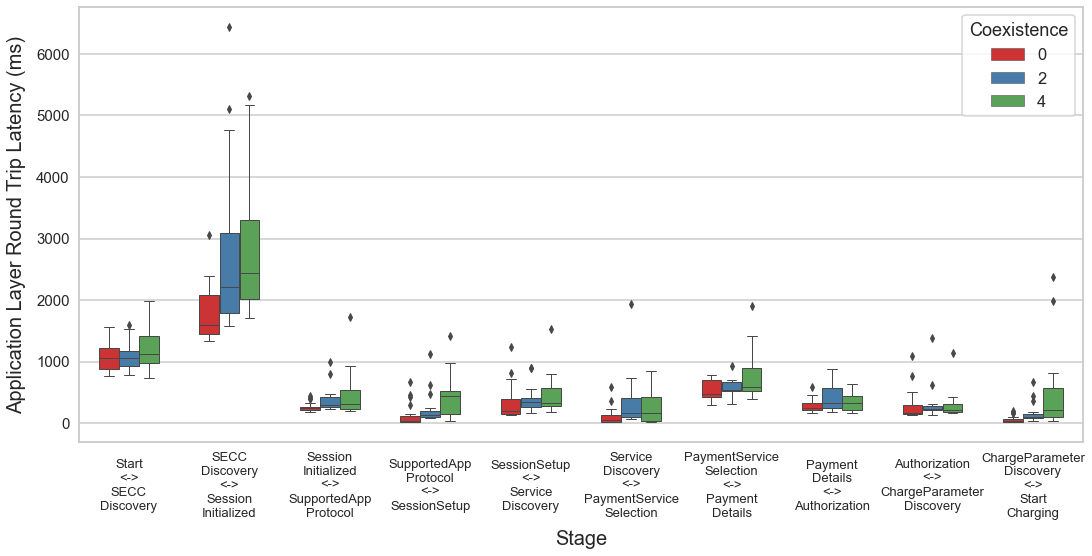

In [9]:
import seaborn as sns

sns.set(rc={'figure.figsize':(18,8)})
#darkgrid, dark, whitegrid, white, ticks
sns.set_style('whitegrid')

#paper, notebook, talk, poster
sns.set_context('talk')
g1 = sns.boxplot(x="Stage", y="Latency (ms)", data=dataframe_all, hue="Coexistence", width=0.6, linewidth=1.0, palette="Set1")
g1.set_ylabel("Application Layer Round Trip Latency (ms)", fontsize = 20, labelpad = 10)
g1.set_xlabel("Stage", fontsize = 20, labelpad = 10)
g1.set_xticklabels(stage_string, fontsize=13, verticalalignment = 'center')
plt.tick_params(axis = 'x', pad = 35)
plt.tick_params(axis = 'y', labelsize=15, pad = 0)
plt.savefig("High resolution.png",dpi=300, bbox_inches = 'tight')

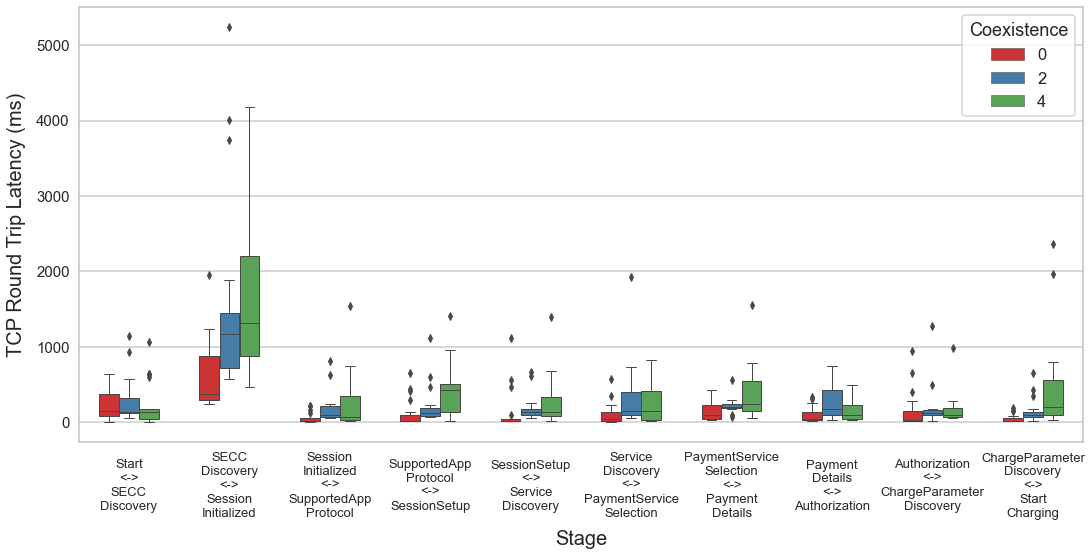

In [10]:
#TCP
sns.set(rc={'figure.figsize':(18,8)})
#darkgrid, dark, whitegrid, white, ticks
sns.set_style('whitegrid')

#paper, notebook, talk, poster
sns.set_context('talk')
g1_TCP = sns.boxplot(x="Stage", y="Latency (ms)", data=dataframe_TCP_all, hue="Coexistence", width=0.6, linewidth=1.0, palette="Set1")
g1_TCP.set_ylabel("TCP Round Trip Latency (ms)", fontsize = 20, labelpad = 10)
g1_TCP.set_xlabel("Stage", fontsize = 20, labelpad = 10)
g1_TCP.set_xticklabels(stage_string, fontsize=13, verticalalignment = 'center')
plt.tick_params(axis = 'x', pad = 35)
plt.tick_params(axis = 'y', labelsize=15, pad = 0)
plt.savefig("High resolution.png",dpi=300, bbox_inches = 'tight')

In [12]:
#Application vs. TCP
dataframe_Application_TCP_0 = pd.concat([interference_0_df_all, interference_0_TCP_df_all])
dataframe_Application_TCP_2 = pd.concat([interference_2_df_all, interference_2_TCP_df_all])
dataframe_Application_TCP_4 = pd.concat([interference_4_df_all, interference_4_TCP_df_all])

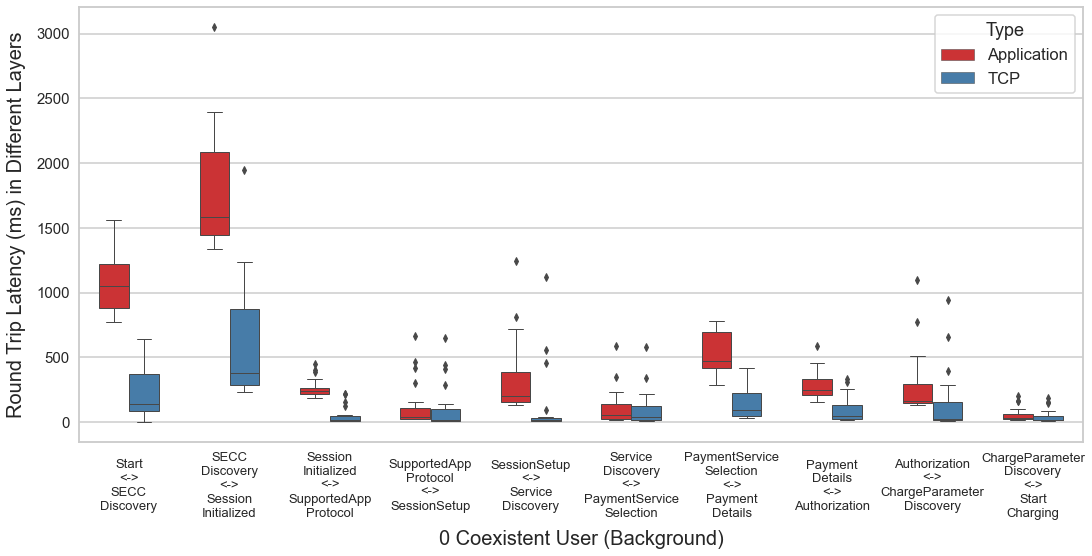

In [13]:
#Application vs. TCP plot
sns.set(rc={'figure.figsize':(18,8)})
#darkgrid, dark, whitegrid, white, ticks
sns.set_style('whitegrid')

#paper, notebook, talk, poster
sns.set_context('talk')
App_TCP_0 = sns.boxplot(x="Stage", y="Latency (ms)", data=dataframe_Application_TCP_0, hue="Type", width=0.6, linewidth=1.0, palette="Set1")
App_TCP_0.set_xlabel("0 Coexistent User (Background)", fontsize = 20, labelpad = 10)
App_TCP_0.set_ylabel("Round Trip Latency (ms) in Different Layers",  fontsize = 20, labelpad = 10)
App_TCP_0.set_xticklabels(stage_string, fontsize=13, verticalalignment = 'center')
plt.tick_params(axis = 'x', pad = 35)
plt.tick_params(axis = 'y', labelsize=15, pad = 0)
plt.savefig("High resolution.png",dpi=300, bbox_inches = 'tight')

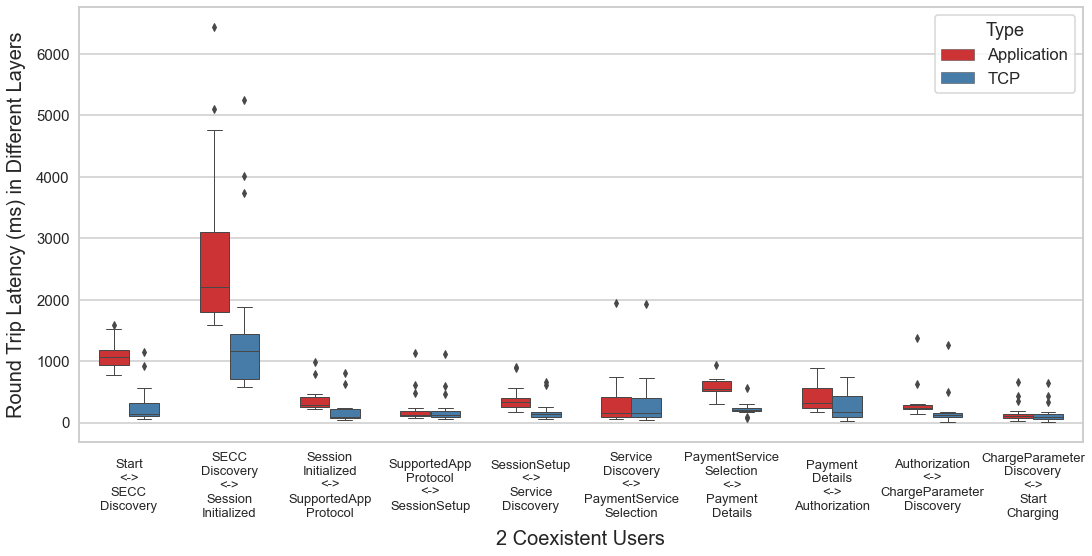

In [34]:
#Application vs. TCP plot
sns.set(rc={'figure.figsize':(18,8)})
#darkgrid, dark, whitegrid, white, ticks
sns.set_style('whitegrid')

#paper, notebook, talk, poster
sns.set_context('talk')
App_TCP_2 = sns.boxplot(x="Stage", y="Latency (ms)", data=dataframe_Application_TCP_2, hue="Type", width=0.6, linewidth=1.0, palette="Set1")
App_TCP_2.set_xlabel("2 Coexistent Users", fontsize = 20, labelpad = 10)
App_TCP_2.set_ylabel("Round Trip Latency (ms) in Different Layers",  fontsize = 20, labelpad = 10)
App_TCP_2.set_xticklabels(stage_string, fontsize=13, verticalalignment = 'center')
plt.tick_params(axis = 'x', pad = 35)
plt.tick_params(axis = 'y', labelsize=15, pad = 0)
plt.savefig("High resolution.png",dpi=300, bbox_inches = 'tight')

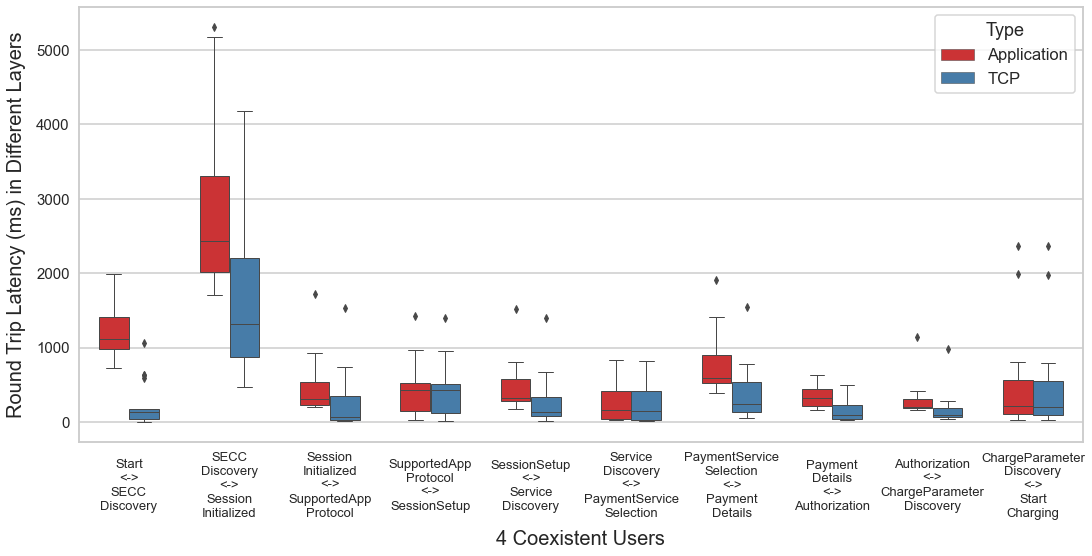

In [35]:
#Application vs. TCP plot
sns.set(rc={'figure.figsize':(18,8)})
#darkgrid, dark, whitegrid, white, ticks
sns.set_style('whitegrid')

#paper, notebook, talk, poster
sns.set_context('talk')
App_TCP_4 = sns.boxplot(x="Stage", y="Latency (ms)", data=dataframe_Application_TCP_4, hue="Type", width=0.6, linewidth=1.0, palette="Set1")
App_TCP_4.set_xlabel("4 Coexistent Users", fontsize = 20, labelpad = 10)
App_TCP_4.set_ylabel("Round Trip Latency (ms) in Different Layers",  fontsize = 20, labelpad = 10)
App_TCP_4.set_xticklabels(stage_string, fontsize=13, verticalalignment = 'center')
plt.tick_params(axis = 'x', pad = 35)
plt.tick_params(axis = 'y', labelsize=15, pad = 0)
plt.savefig("High resolution.png",dpi=300, bbox_inches = 'tight')

In [36]:
#Plot each stage latency normalized to timeout value

#stage -1: communication setup
def construct_dataframe_comm_setup_normalized(list_chunk, interference_num):
    return pd.DataFrame({'Latency/Timeout': [sum(x)/(20*1000) for x in zip(list_chunk[0],
                                                              list_chunk[1],
                                                              list_chunk[2],
                                                              list_chunk[3])],
                         'Coexistence': [interference_num for _ in range(len(list_chunk[0]))],
                         'Stage': [-1 for _ in range(len(list_chunk[0]))]
                        })

timeout_value = [2000, 2000, 2000, 2000, 5000, 2000, 2000, 5000]
def construct_dataframe_normalized(list_chunk, interference_num, index):
    return pd.DataFrame({'Latency/Timeout': [x/timeout_value[index-2] for x in list_chunk[index]],
                         'Coexistence': [interference_num for _ in range(len(list_chunk[index]))],
                         'Stage': [index+1 for _ in range(len(list_chunk[index]))]
                        })

stage_num = 10
interference_0_df_normalized_comm_setup = construct_dataframe_comm_setup_normalized(interference_0_list_chunks, 0)
interference_0_df_normalized = {i: construct_dataframe_normalized(interference_0_list_chunks, 0, i) for i in range(2, stage_num)}

interference_2_df_normalized_comm_setup = construct_dataframe_comm_setup_normalized(interference_2_list_chunks, 2)
interference_2_df_normalized = {i: construct_dataframe_normalized(interference_2_list_chunks, 2, i) for i in range(2, stage_num)}

interference_4_df_normalized_comm_setup = construct_dataframe_comm_setup_normalized(interference_4_list_chunks, 4)
interference_4_df_normalized = {i: construct_dataframe_normalized(interference_4_list_chunks, 4, i) for i in range(2, stage_num)}

interference_0_df_normalized_all = pd.concat(interference_0_df_normalized[i] for i in range(2, stage_num))
interference_2_df_normalized_all = pd.concat(interference_2_df_normalized[i] for i in range(2, stage_num))
interference_4_df_normalized_all = pd.concat(interference_4_df_normalized[i] for i in range(2, stage_num))

dataframe_all_normalized = pd.concat([interference_0_df_normalized_comm_setup,
                                      interference_0_df_normalized_all,
                                      interference_2_df_normalized_comm_setup,
                                      interference_2_df_normalized_all,
                                      interference_4_df_normalized_comm_setup,
                                      interference_4_df_normalized_all])

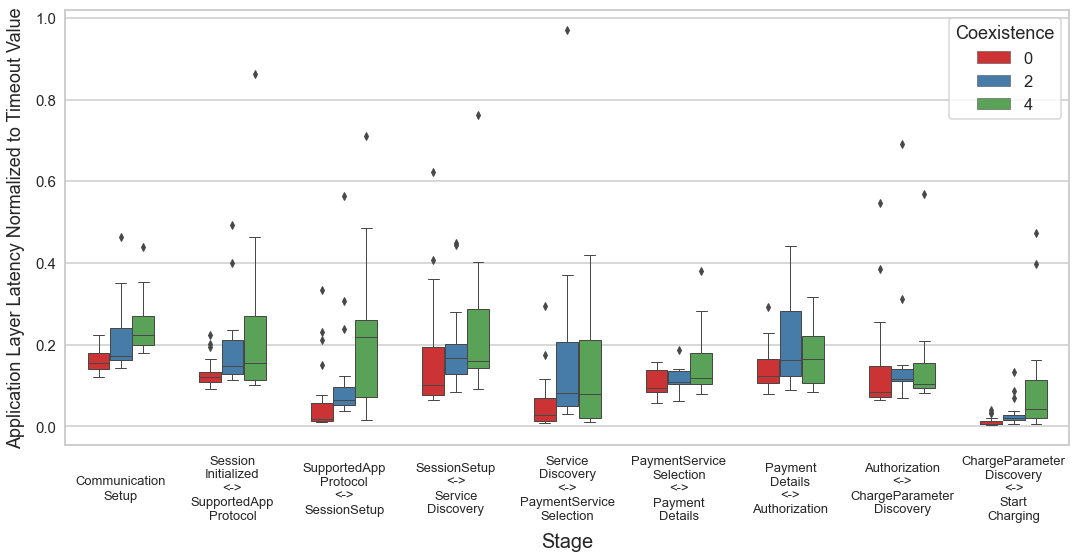

In [37]:
sns.set(rc={'figure.figsize':(18,8)})
#darkgrid, dark, whitegrid, white, ticks
sns.set_style('whitegrid')

stage_string_normalized = ["Communication\nSetup",
    "Session\nInitialized\n<->\nSupportedApp\nProtocol",
    "SupportedApp\nProtocol\n<->\nSessionSetup",
    "SessionSetup\n<->\nService\nDiscovery",
    "Service\nDiscovery\n<->\nPaymentService\nSelection",
    "PaymentService\nSelection\n<->\nPayment\nDetails",
    "Payment\nDetails\n<->\nAuthorization",
    "Authorization\n<->\nChargeParameter\nDiscovery",
    "ChargeParameter\nDiscovery\n<->\nStart\nCharging"
    ]

#paper, notebook, talk, poster
sns.set_context('talk')
g_normalized = sns.boxplot(x="Stage", y="Latency/Timeout", data=dataframe_all_normalized, hue="Coexistence", width=0.6, linewidth=1.0, palette="Set1")
g_normalized.set_xlabel("Stage", fontsize = 20, labelpad = 10)
g_normalized.set_ylabel("Application Layer Latency Normalized to Timeout Value",  fontsize = 18, labelpad = 10)
g_normalized.set_xticklabels(stage_string_normalized, fontsize=13, verticalalignment = 'center')
plt.tick_params(axis = 'x', pad = 35)
plt.tick_params(axis = 'y', labelsize=15, pad = 0)
plt.savefig("High resolution.png",dpi=300, bbox_inches = 'tight')

In [ ]:
def plot_general_latency(chunks_array):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 8)
    data = [chunks_array[10], chunks_array[11], chunks_array[13]]
    ax.boxplot(data)
    plt.grid()
    plt.show()

plot_general_latency(interference_0_list_chunks)

In [38]:
#General Latency
def construct_dataframe(list_chunk, interference_num, index):
    return pd.DataFrame({'Latency (ms)': list_chunk[index],
                         'Coexistence': [interference_num for _ in range(len(list_chunk[index]))],
                         'Stage': [index+1 for _ in range(len(list_chunk[index]))]
                        })

general_stage_num = 3
interference_0_df_general = pd.concat([construct_dataframe(interference_0_list_chunks, 0, 10),
                                       construct_dataframe(interference_0_list_chunks, 0, 11)
                                       ])
interference_2_df_general = pd.concat([construct_dataframe(interference_2_list_chunks, 2, 10),
                                       construct_dataframe(interference_2_list_chunks, 2, 11)
                                       ])
interference_4_df_general = pd.concat([construct_dataframe(interference_4_list_chunks, 4, 10),
                                       construct_dataframe(interference_4_list_chunks, 4, 11)
                                       ])

dataframe_all_general = pd.concat([interference_0_df_general,
                                   interference_2_df_general,
                                   interference_4_df_general])

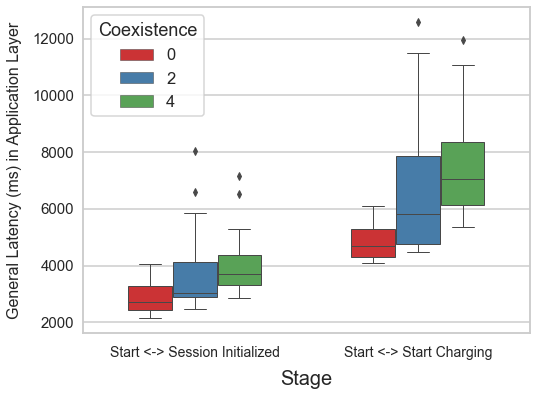

In [39]:
sns.set(rc={'figure.figsize':(8,6)})
#darkgrid, dark, whitegrid, white, ticks
sns.set_style('whitegrid')

#paper, notebook, talk, poster
sns.set_context('talk')
g3 = sns.boxplot(x="Stage", y="Latency (ms)", data=dataframe_all_general, hue="Coexistence", width=0.6, linewidth=1.0, palette="Set1")
g3.set_xlabel("Stage", fontsize = 20, labelpad = 10)
g3.set_ylabel("General Latency (ms) in Application Layer",  fontsize = 16, labelpad = 10)
g3.set_xticklabels([
    "Start <-> Session Initialized",
    "Start <-> Start Charging"],
    fontsize=14)
plt.tick_params(axis = 'y', labelsize=15, pad = 0)
plt.savefig("High resolution.png",dpi=300, bbox_inches = 'tight')

In [40]:
#Calculate the increasing rate of general latency
from statistics import mean
print("Start <-> Session Initialized")
print(mean(interference_0_list_chunks[10]))
print(mean(interference_2_list_chunks[10]))
print(mean(interference_4_list_chunks[10]))
print((mean(interference_2_list_chunks[10])-mean(interference_0_list_chunks[10]))/mean(interference_0_list_chunks[10])*100)
print((mean(interference_4_list_chunks[10])-mean(interference_0_list_chunks[10]))/mean(interference_0_list_chunks[10])*100)

print("\nStart <-> Start Charging")
print(mean(interference_0_list_chunks[11]))
print(mean(interference_2_list_chunks[11]))
print(mean(interference_4_list_chunks[11]))
print((mean(interference_2_list_chunks[11])-mean(interference_0_list_chunks[11]))/mean(interference_0_list_chunks[11])*100)
print((mean(interference_4_list_chunks[11])-mean(interference_0_list_chunks[11]))/mean(interference_0_list_chunks[11])*100)

Start <-> Session Initialized
2851.45
3831.294117647059
4120.705882352941
34.363012419893714
44.51264733216229

Start <-> Start Charging
4835
6676.411764705882
7624
38.08504166920128
57.68355739400207


In [ ]:
interference_0_df_general_last = construct_dataframe(interference_0_list_chunks, 0, 13)
interference_2_df_general_last = construct_dataframe(interference_2_list_chunks, 2, 13)
interference_4_df_general_last = construct_dataframe(interference_4_list_chunks, 4, 13)

dataframe_all_general_last = pd.concat([interference_0_df_general_last,
                                   interference_2_df_general_last,
                                   interference_4_df_general_last])

sns.set(rc={'figure.figsize':(4,6)})
#darkgrid, dark, whitegrid, white, ticks
sns.set_style('whitegrid')

#paper, notebook, talk, poster
# sns.set_context('talk')
g4 = sns.boxplot(x="Stage", y="Latency (ms)", data=dataframe_all_general_last, hue="Interference", width=0.5, linewidth=1.0, palette="Set1")


g4.set_xticklabels(["Stop Charging\n<->\nSession Close"],fontsize=9)

In [55]:
#Plot per stage delay CDF
plt.rcParams["figure.figsize"] = [8, 6]
plt.rcParams["legend.loc"] = 'best'
plt.rcParams["figure.autolayout"] = True

stage_to_string = [
    "Start <-> SECC Discovery",
    "SECC Discovery <-> Session Initialized",
    "Session Initialized <-> SupportedAppProtocol",
    "SupportedAppProtocol <-> SessionSetup",
    "SessionSetup <-> ServiceDiscovery",
    "ServiceDiscovery <-> PaymentServiceSelection",
    "PaymentServiceSelection <-> PaymentDetail",
    "PaymentDetail <-> Authorization",
    "Authorization <-> ChargeParameterDiscovery",
    "ChargeParameterDiscovery <-> Start Charging"
    ]

# bins can be treated like "precision"
# Number of the data must be big enough for cdf starting from near zero

def plot_each_stage_cdf(interference_chunk, stage_num):
    count, bins_count = np.histogram(interference_chunk[stage_num], bins=20)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf)
    plt.title("Stage: " + str(stage_to_string[stage_num]), fontsize = 18, pad = 12)
    plt.xlabel("Application Layer Round Trip Latency (ms)" , fontsize = 16, labelpad = 10)
    plt.ylabel("Cumulative Probability", fontsize = 16, labelpad = 10)
    plt.tick_params(axis = 'both', labelsize=15, pad = 0)
    #plt.legend(["0 Coexistent User","2 Coexistent Users", "4 Coexistent Users"])

# timeout_val in ms
def plot_cdf(stage_num, timeout_val):
    plot_each_stage_cdf(interference_0_list_chunks, stage_num)
    plot_each_stage_cdf(interference_2_list_chunks, stage_num)
    plot_each_stage_cdf(interference_4_list_chunks, stage_num)
    if(timeout_val):
        plt.axvline(x= timeout_val, color='r', linestyle='-', label='Timeout', linewidth=2)
        plt.legend(["0 Coexistent User","2 Coexistent Users", "4 Coexistent Users"])
    else:
        plt.legend(["0 Coexistent User","2 Coexistent Users", "4 Coexistent Users"])
    file_name = "Stage" + str(stage_num+1) + ".png"
    plt.savefig(file_name, dpi=300, bbox_inches = 'tight')

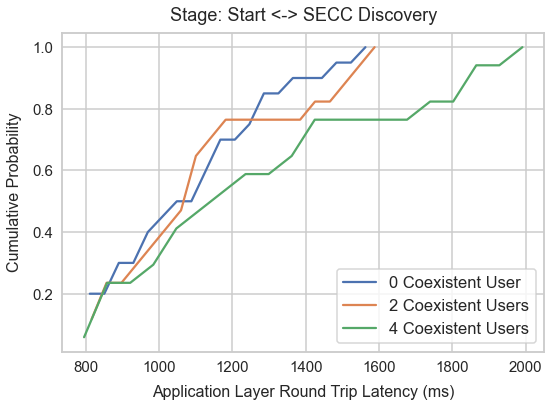

In [42]:
plot_cdf(0, None)

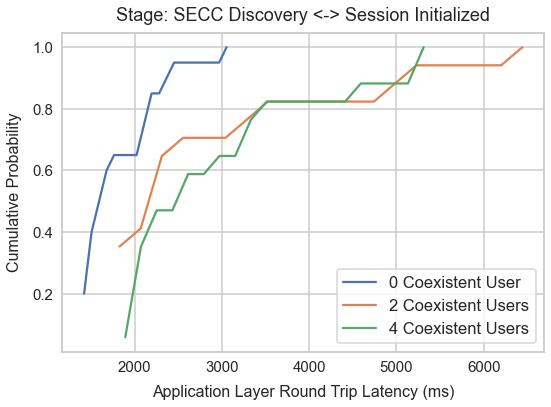

In [43]:
plot_cdf(1, None)

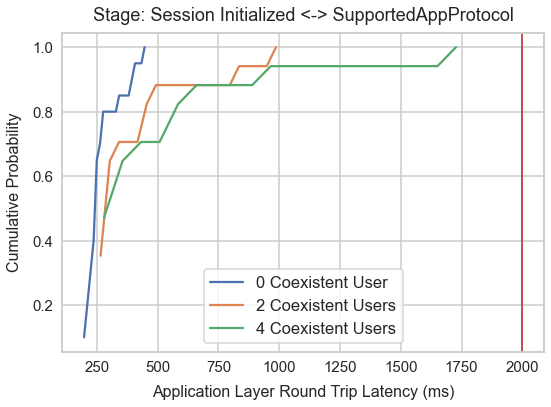

In [56]:
plot_cdf(2, 2000)

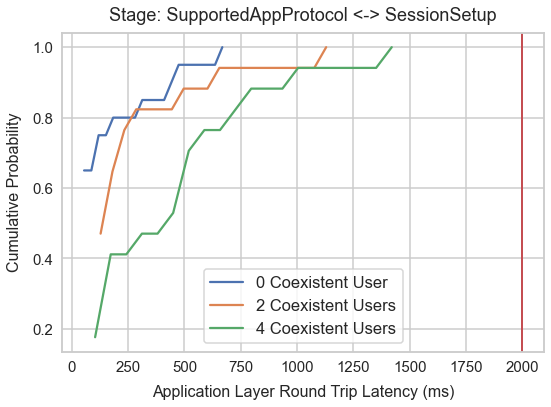

In [57]:
plot_cdf(3, 2000)

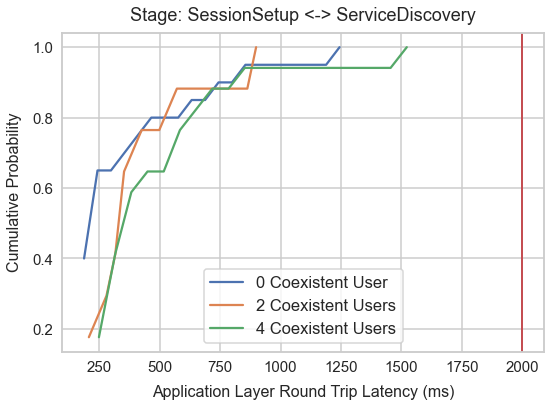

In [58]:
plot_cdf(4, 2000)

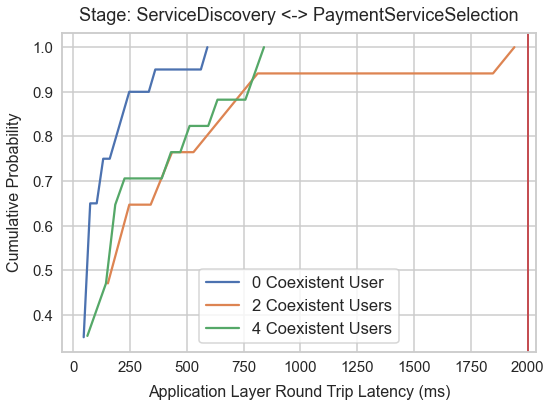

In [59]:
plot_cdf(5, 2000)

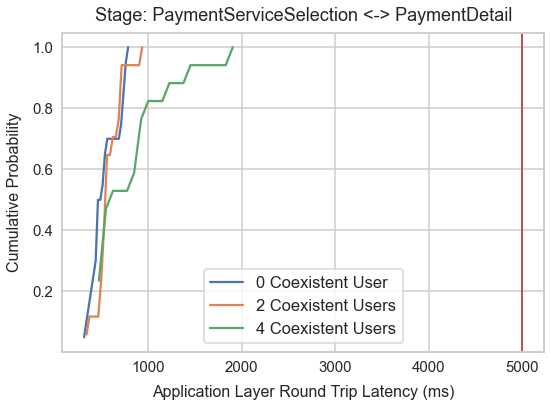

In [60]:
plot_cdf(6, 5000)

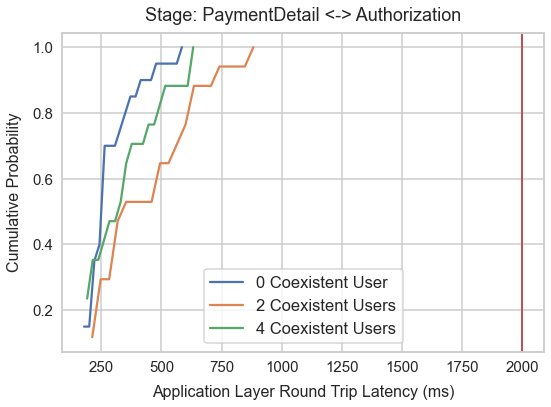

In [61]:
plot_cdf(7, 2000)

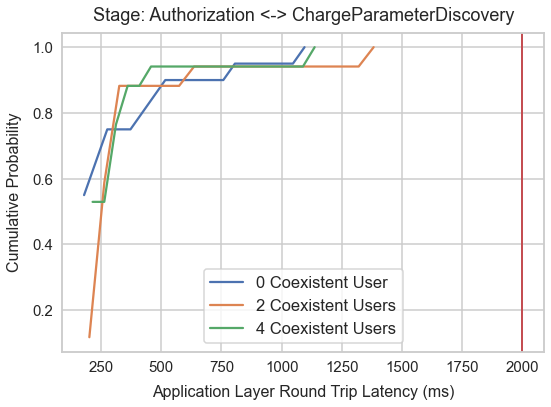

In [62]:
plot_cdf(8, 2000)

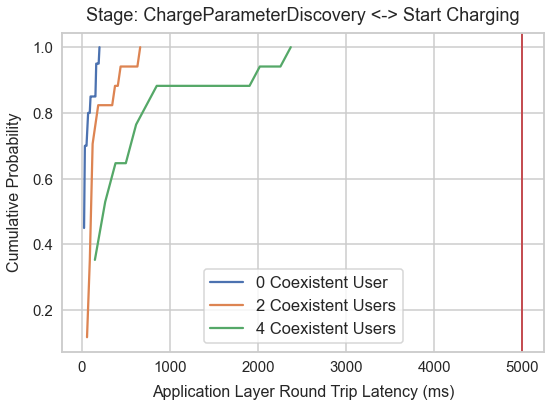

In [63]:
plot_cdf(9, 5000)

[3952, 3988, 2806, 2805, 2768, 3027, 3684, 2911, 2417, 4495, 3482, 3047, 3578, 2647, 3381, 3058, 3146, 2690, 3311, 3686]
[5697, 3439, 3326, 6893, 3262, 3731, 3341, 4751, 3015, 3007, 4786, 6998, 3367, 3076, 9263, 4812, 2843]
[4424, 4500, 4721, 3997, 7059, 3694, 4486, 3697, 4932, 4154, 5389, 3974, 5387, 8781, 5714, 6325, 3608]


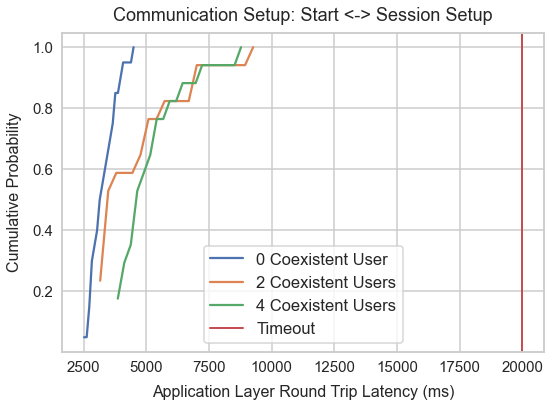

In [52]:
#Plot EVCC Communication Setup Timer 20 s
def plot_communication_setup_cdf(interference_chunk):
    interference_chunk_setup_comm_list = [sum(x) for x in zip(interference_chunk[0],
                                                              interference_chunk[1],
                                                              interference_chunk[2],
                                                              interference_chunk[3])]
    #for debug
    print((interference_chunk_setup_comm_list))
    
    plt.rcParams["figure.figsize"] = [8, 6]
    plt.rcParams["legend.loc"] = 'best'
    plt.rcParams["figure.autolayout"] = True
    
    count, bins_count = np.histogram(interference_chunk_setup_comm_list, bins=20)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf)
    plt.title("Communication Setup: Start <-> Session Setup", fontsize = 18, pad = 12)
    plt.xlabel("Application Layer Round Trip Latency (ms)" , fontsize = 16, labelpad = 10)
    plt.ylabel("Cumulative Probability", fontsize = 16, labelpad = 10)
    
    plt.tick_params(axis = 'both', labelsize=15, pad = 0)
    

plot_communication_setup_cdf(interference_0_list_chunks)
plot_communication_setup_cdf(interference_2_list_chunks)
plot_communication_setup_cdf(interference_4_list_chunks)
plt.axvline(x= 20*1000, color='r', linestyle='-', label='Timeout Value', linewidth=2)
plt.legend(["0 Coexistent User","2 Coexistent Users", "4 Coexistent Users", "Timeout"])
plt.savefig("Stage-1.png", dpi=300, bbox_inches = 'tight')